In [1]:
import sys
sys.path.insert(0, "../")
from SC_Utils.game_utils import ObsProcesser, get_action_dict
from SC_Utils.train_v2 import *
from SC_Utils.inspection_plots import *
import AC_modules.Networks as net
from AC_modules.BatchedA2C import SpatialA2C, SpatialA2C_v1, SpatialA2C_v2, SpatialA2C_v3
import torch

pygame 1.9.6
Hello from the pygame community. https://www.pygame.org/contribute.html


In [32]:
jump = 120000
n = 19
step_idx =jump*n
step_idx

2280000

# Trajectories

In [33]:
game_names = {1:'MoveToBeacon',
              2:'CollectMineralShards',
              3:'DefeatRoaches',
              4:'FindAndDefeatZerglings',
              5:'DefeatZerglingsAndBanelings',
              6:'CollectMineralsAndGas',
              7:'BuildMarines'
              }
map_name = game_names[4]

In [34]:
load_dir = "../Results/"+map_name+"/Inspection/"
PID = "TEXW"
step_idx = step_idx
insp_dict = np.load(load_dir+PID+"_"+str(step_idx)+".npy", allow_pickle=True).item()

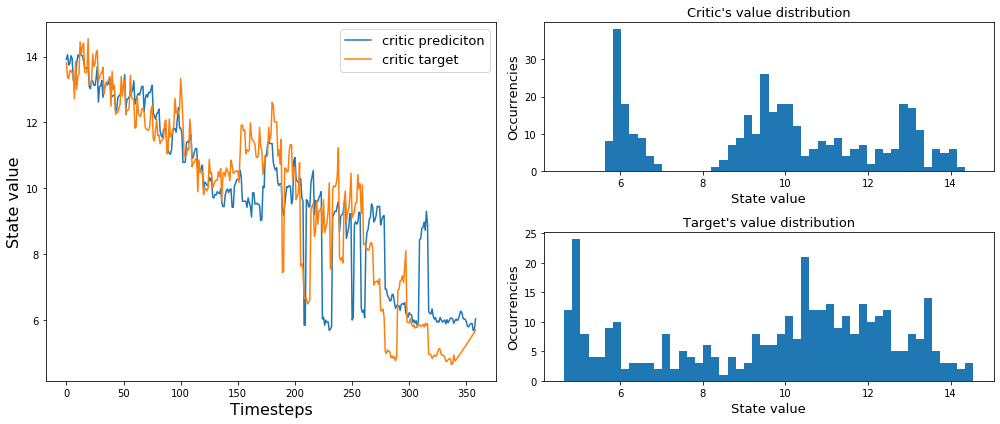

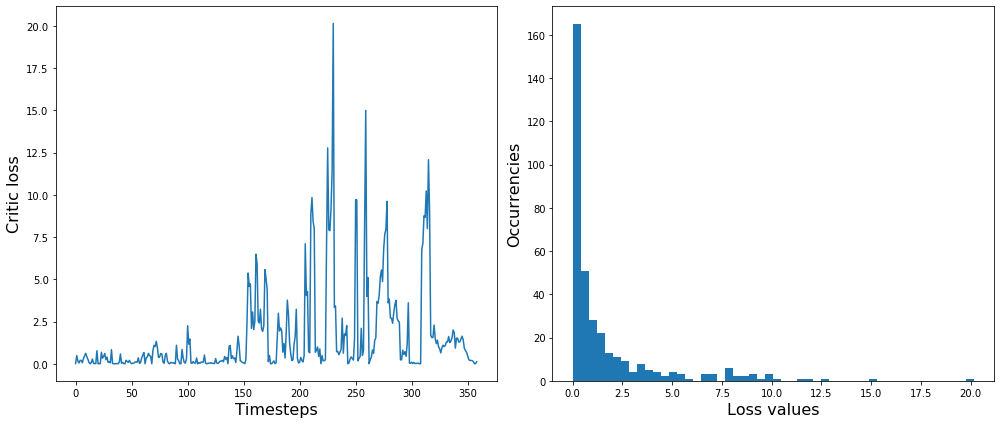

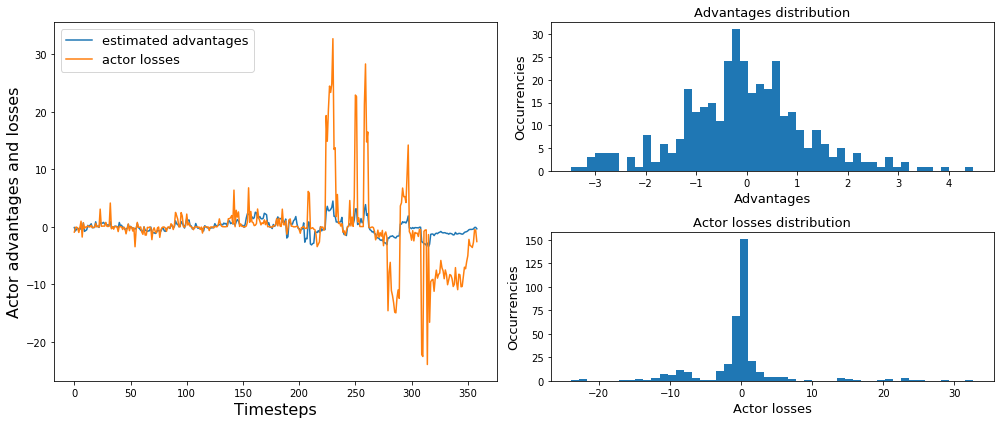

In [35]:
plot_update_curves(insp_dict)

# Agent related visualization

In [36]:
# Environment parameters
RESOLUTION = 32
MAX_STEPS = 256
game_params = dict(feature_screen=RESOLUTION, feature_minimap=RESOLUTION, action_space="FEATURES") 
game_names = {1:'MoveToBeacon',
              2:'CollectMineralShards',
              3:'DefeatRoaches',
              4:'FindAndDefeatZerglings',
              5:'DefeatZerglingsAndBanelings',
              6:'CollectMineralsAndGas',
              7:'BuildMarines'
              }
map_name = game_names[4]

# Observation Processer parameters
#screen_names = ['visibility_map', 'player_relative', 'selected', 'unit_density', 'unit_density_aa']
#minimap_names = []
#obs_proc_params = {'screen_names':screen_names, 'minimap_names':minimap_names}
obs_proc_params = {'select_all':True}
env = init_game(game_params, map_name)
op = ObsProcesser(**obs_proc_params)
screen_channels, minimap_channels = op.get_n_channels()
in_channels = screen_channels + minimap_channels 
#action_names = ['select_point', 'Move_screen']
#action_names = ['no_op', 'select_army', 'Attack_screen', 'Move_screen', 'select_point', 'select_rect']
action_names = ['select_army', 'Attack_screen', 'Move_screen', 'select_point', 'select_rect',
                'move_camera','Stop_quick','Move_minimap','Attack_minimap','HoldPosition_quick']
action_dict = get_action_dict(action_names)

In [37]:
#PID = "TEXW"#"VYPP"
load=False
if load:
    agent = torch.load("../Results/CollectMineralShards/agent_"+PID, map_location='cpu')
    agent.device = 'cpu'
else:
    action_space = len(action_dict)
    spatial_model = net.FullyConvSpatial
    nonspatial_model = net.FullyConvNonSpatial
    embed_dim = 8
    n_channels = 32
    n_features = 256
    spatial_dict = {"in_channels":in_channels}
    nonspatial_dict = {'resolution':RESOLUTION, 'kernel_size':3, 'stride':2}
    HPs = dict(action_space=action_space, n_steps=20, H=1e-3, 
           spatial_model=spatial_model, nonspatial_model=nonspatial_model,
           n_features=n_features, n_channels=n_channels, 
           spatial_dict=spatial_dict, nonspatial_dict=nonspatial_dict, 
           action_dict=action_dict)

    HPs['device'] = 'cpu'
    version = 2
    if version == 1:
        HPs = {**HPs, 'embed_dim':embed_dim}
        agent = SpatialA2C_v1(env=env, **HPs)
    elif version == 2:
        # no action embedding
        agent = SpatialA2C_v2(env=env, **HPs)
    elif version == 3:
        agent = SpatialA2C_v3(env=env, **HPs)
    else:
        raise Exception("Version not implemented.")
        
    # Load proper checkpoint here

In [38]:
inspector = inspection_test(step_idx, agent, env, PID, op, action_dict)

In [39]:
_, layer_names = op.get_state(env.reset())
layer_names

{'screen_names': array(['visibility_map_1', 'visibility_map_2', 'player_id_1',
        'player_id_2', 'player_id_16', 'player_relative_1',
        'player_relative_3', 'player_relative_4', 'unit_type_9',
        'unit_type_18', 'unit_type_48', 'unit_type_105', 'unit_type_110',
        'unit_type_317', 'unit_type_341', 'unit_type_342',
        'unit_type_1680', 'selected_1', 'unit_hit_points',
        'unit_hit_points_ratio', 'unit_density', 'unit_density_aa',
        'pathable_1', 'buildable_1'], dtype='<U21'),
 'minimap_names': array(['visibility_map_1', 'visibility_map_2', 'camera_1', 'player_id_1',
        'player_id_2', 'player_id_16', 'player_relative_1',
        'player_relative_3', 'player_relative_4', 'selected_1',
        'pathable_1', 'buildable_1'], dtype='<U17')}


Step 0
Action select_army - prob: 0.00
Action Attack_screen - prob: 0.00
Action Move_screen - prob: 0.00
Action select_point - prob: 0.00
Action select_rect - prob: 0.00
Action move_camera - prob: 1.00
Action Stop_quick - prob: 0.00
Action Move_minimap - prob: 0.00
Action Attack_minimap - prob: 0.00
Action HoldPosition_quick - prob: 0.00
-----------------------------------
Action chosen:  move_camera


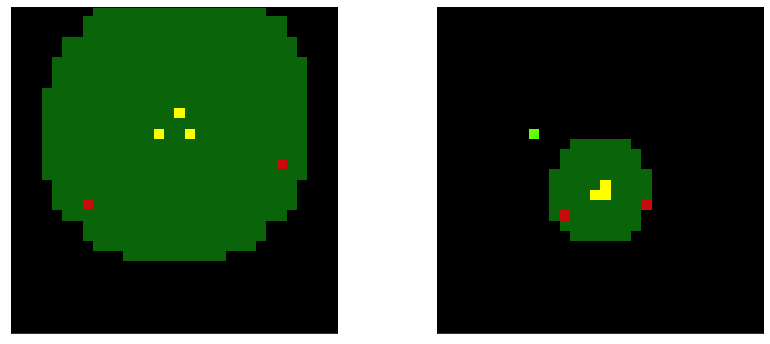

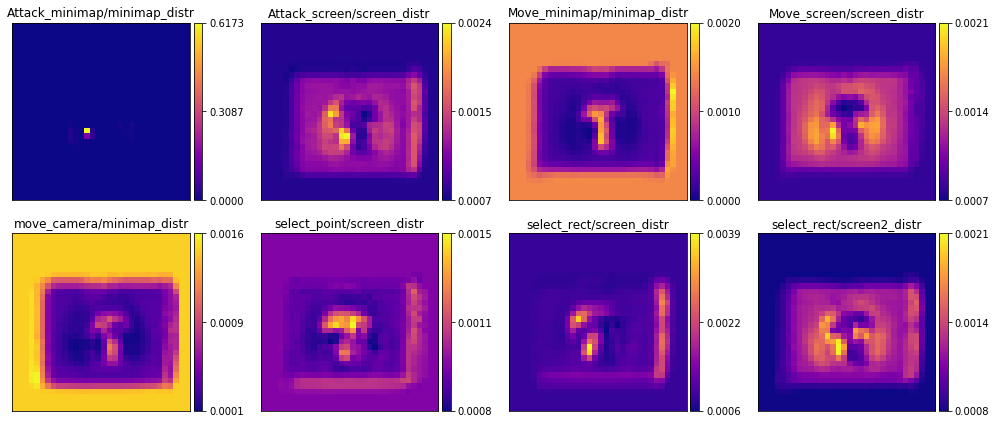


Step 1
Action select_army - prob: 0.00
Action Attack_screen - prob: 0.00
Action Move_screen - prob: 0.00
Action select_point - prob: 0.00
Action select_rect - prob: 0.00
Action move_camera - prob: 0.00
Action Stop_quick - prob: 0.00
Action Move_minimap - prob: 0.00
Action Attack_minimap - prob: 1.00
Action HoldPosition_quick - prob: 0.00
-----------------------------------
Action chosen:  Attack_minimap


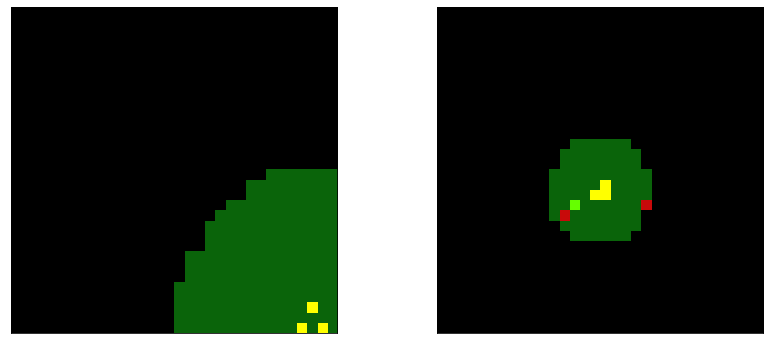

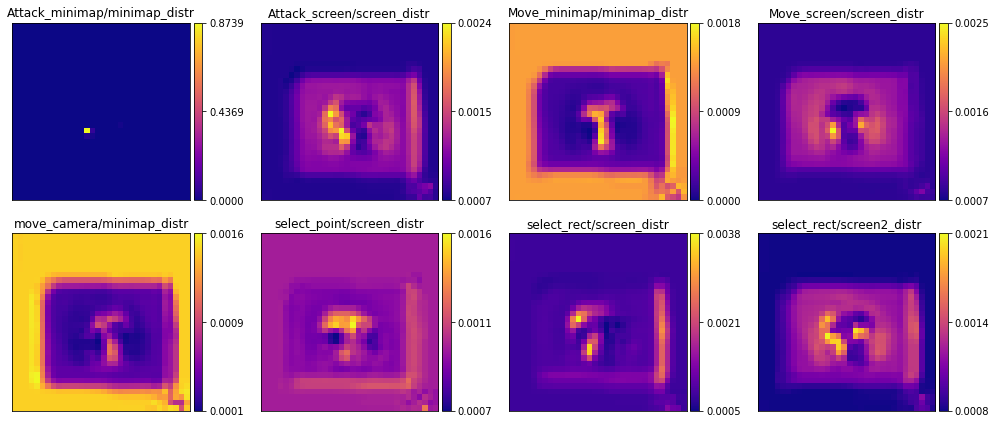


Step 2
Action select_army - prob: 0.00
Action Attack_screen - prob: 0.00
Action Move_screen - prob: 0.00
Action select_point - prob: 0.00
Action select_rect - prob: 0.00
Action move_camera - prob: 0.00
Action Stop_quick - prob: 0.00
Action Move_minimap - prob: 0.00
Action Attack_minimap - prob: 1.00
Action HoldPosition_quick - prob: 0.00
-----------------------------------
Action chosen:  Attack_minimap


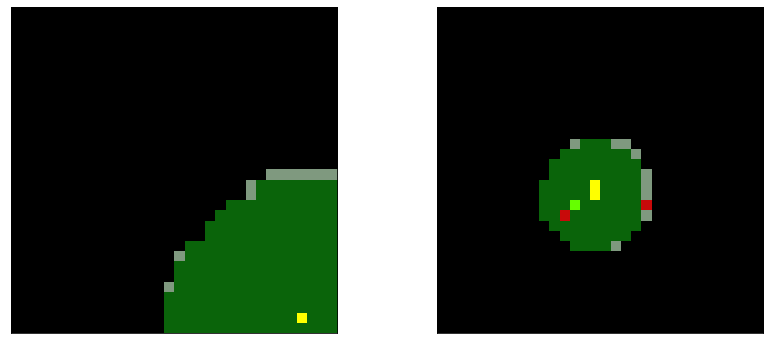

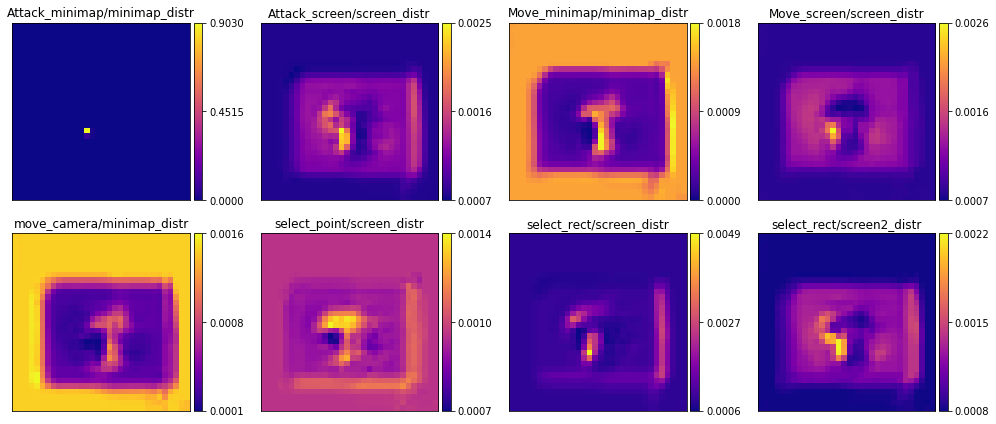


Step 3
Action select_army - prob: 0.00
Action Attack_screen - prob: 0.00
Action Move_screen - prob: 0.00
Action select_point - prob: 0.00
Action select_rect - prob: 0.00
Action move_camera - prob: 0.00
Action Stop_quick - prob: 0.00
Action Move_minimap - prob: 0.00
Action Attack_minimap - prob: 1.00
Action HoldPosition_quick - prob: 0.00
-----------------------------------
Action chosen:  Attack_minimap


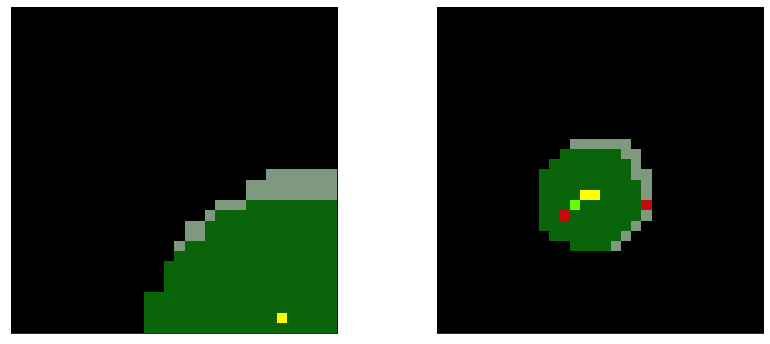

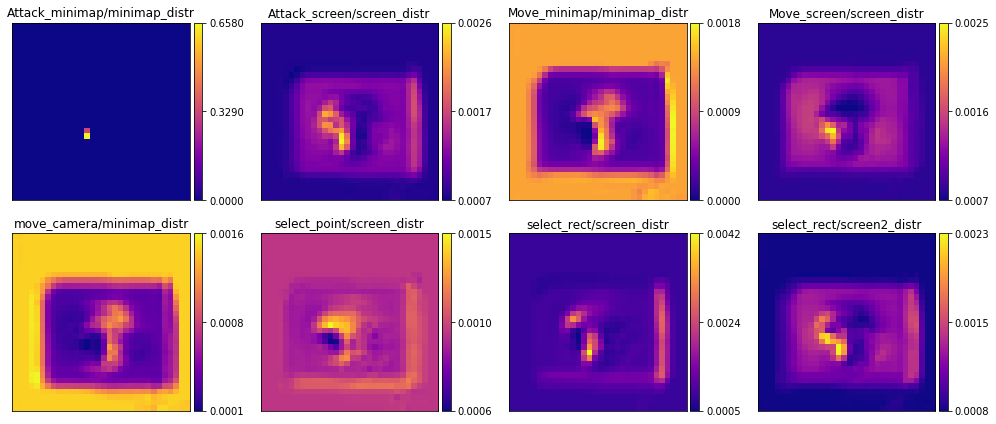


Step 4
Action select_army - prob: 0.00
Action Attack_screen - prob: 0.00
Action Move_screen - prob: 0.00
Action select_point - prob: 0.00
Action select_rect - prob: 0.00
Action move_camera - prob: 0.00
Action Stop_quick - prob: 0.00
Action Move_minimap - prob: 0.00
Action Attack_minimap - prob: 1.00
Action HoldPosition_quick - prob: 0.00
-----------------------------------
Action chosen:  Attack_minimap


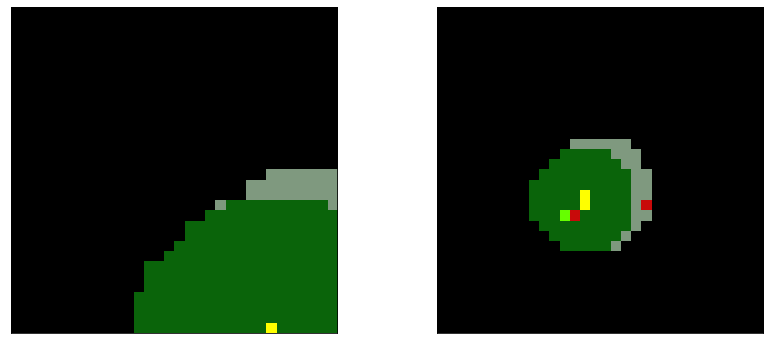

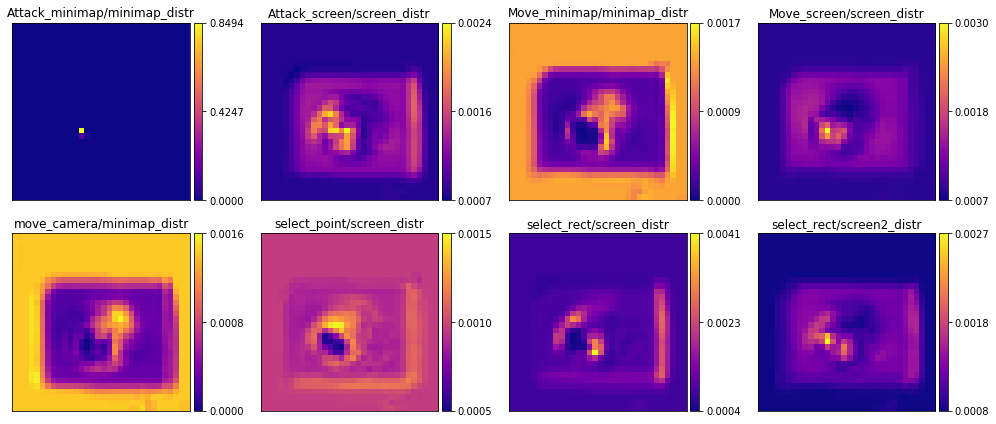


Step 5
Action select_army - prob: 0.00
Action Attack_screen - prob: 0.00
Action Move_screen - prob: 0.00
Action select_point - prob: 0.00
Action select_rect - prob: 0.00
Action move_camera - prob: 0.00
Action Stop_quick - prob: 0.00
Action Move_minimap - prob: 0.00
Action Attack_minimap - prob: 1.00
Action HoldPosition_quick - prob: 0.00
-----------------------------------
Action chosen:  Attack_minimap


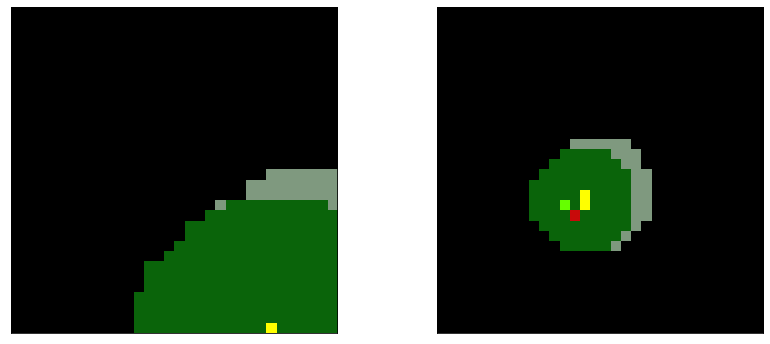

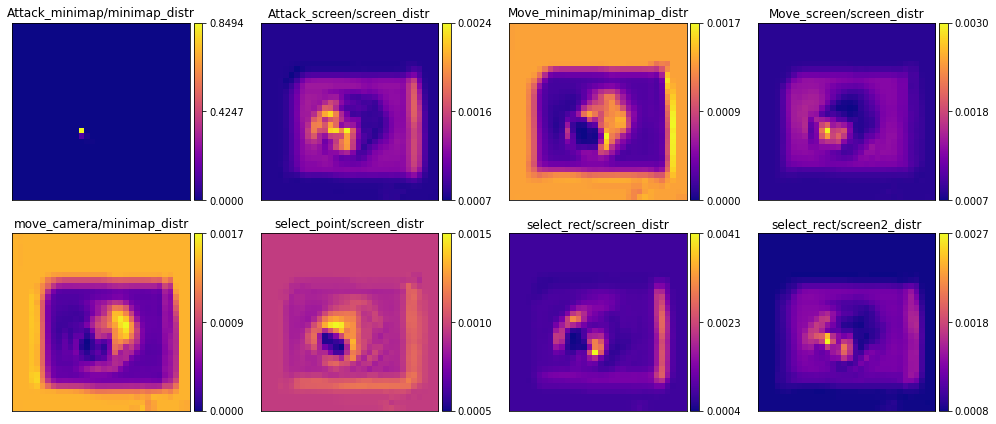


Step 6
Action select_army - prob: 0.00
Action Attack_screen - prob: 0.00
Action Move_screen - prob: 0.00
Action select_point - prob: 0.00
Action select_rect - prob: 0.00
Action move_camera - prob: 0.00
Action Stop_quick - prob: 0.00
Action Move_minimap - prob: 0.00
Action Attack_minimap - prob: 1.00
Action HoldPosition_quick - prob: 0.00
-----------------------------------
Action chosen:  Attack_minimap


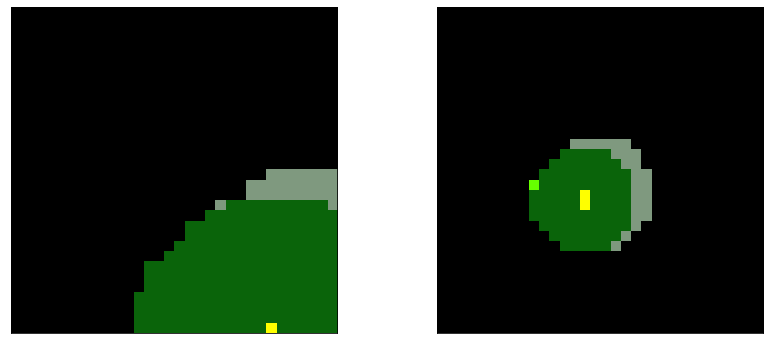

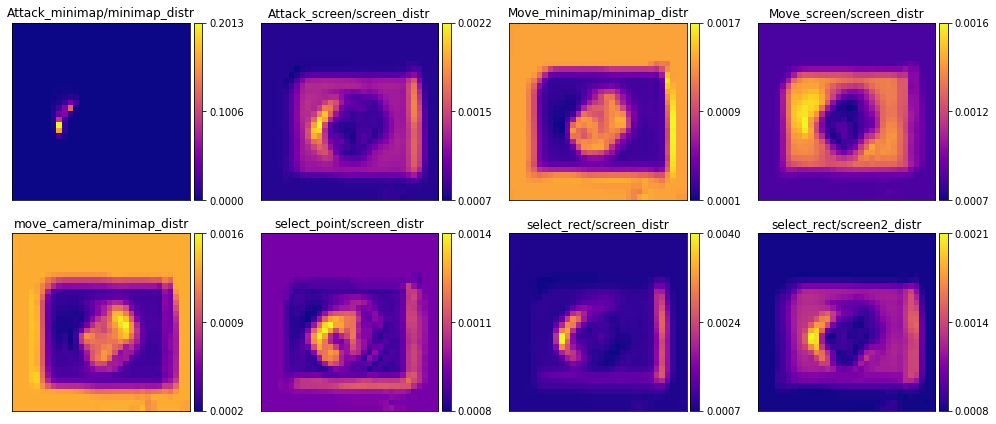


Step 7
Action select_army - prob: 0.00
Action Attack_screen - prob: 0.00
Action Move_screen - prob: 0.00
Action select_point - prob: 0.00
Action select_rect - prob: 0.00
Action move_camera - prob: 0.00
Action Stop_quick - prob: 0.00
Action Move_minimap - prob: 0.00
Action Attack_minimap - prob: 1.00
Action HoldPosition_quick - prob: 0.00
-----------------------------------
Action chosen:  Attack_minimap


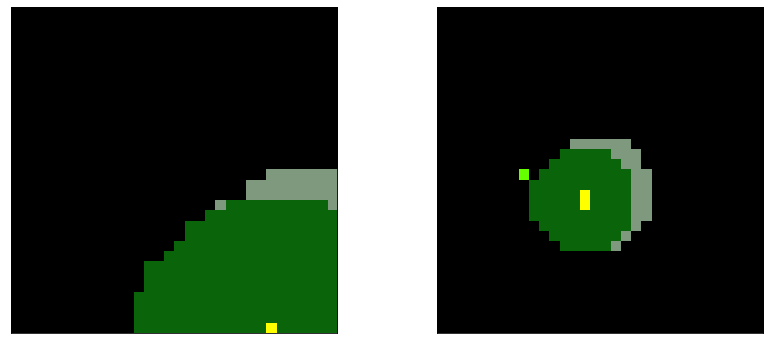

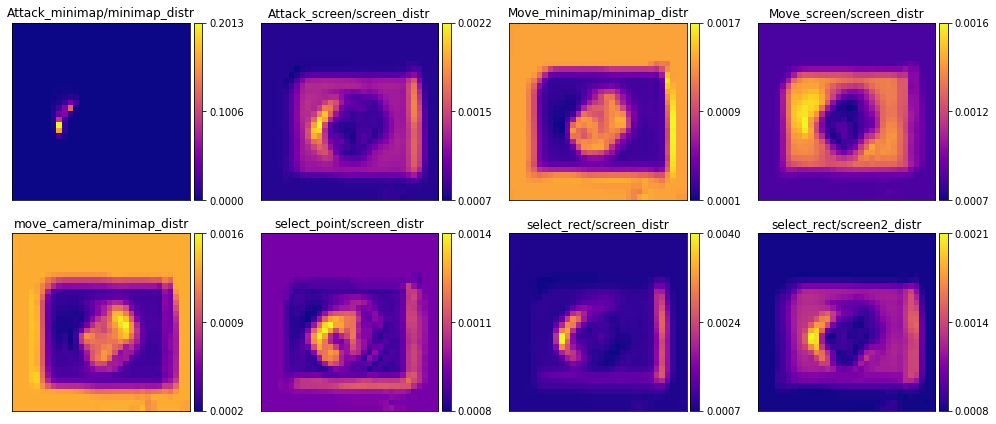


Step 8
Action select_army - prob: 0.00
Action Attack_screen - prob: 0.00
Action Move_screen - prob: 0.00
Action select_point - prob: 0.00
Action select_rect - prob: 0.00
Action move_camera - prob: 0.00
Action Stop_quick - prob: 0.00
Action Move_minimap - prob: 0.00
Action Attack_minimap - prob: 1.00
Action HoldPosition_quick - prob: 0.00
-----------------------------------
Action chosen:  Attack_minimap


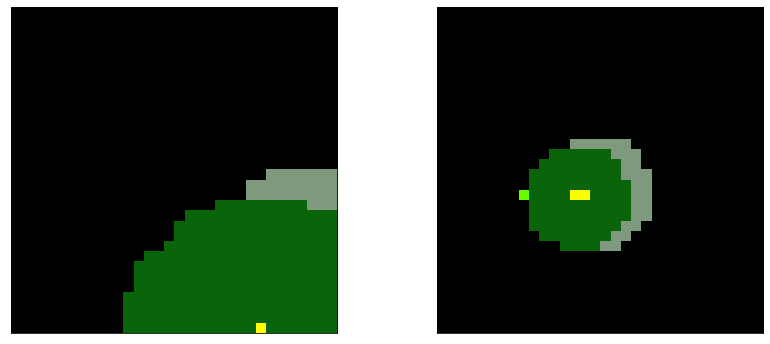

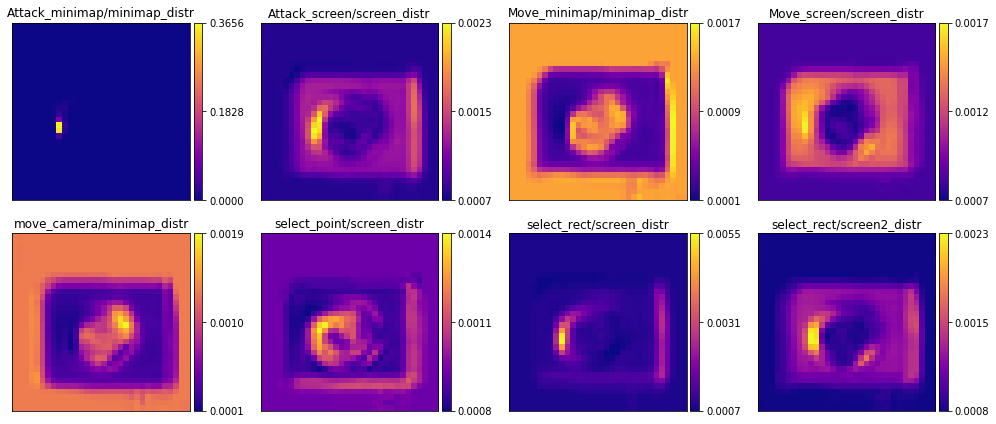


Step 9
Action select_army - prob: 0.00
Action Attack_screen - prob: 0.00
Action Move_screen - prob: 0.00
Action select_point - prob: 0.00
Action select_rect - prob: 0.00
Action move_camera - prob: 0.00
Action Stop_quick - prob: 0.00
Action Move_minimap - prob: 0.00
Action Attack_minimap - prob: 1.00
Action HoldPosition_quick - prob: 0.00
-----------------------------------
Action chosen:  Attack_minimap


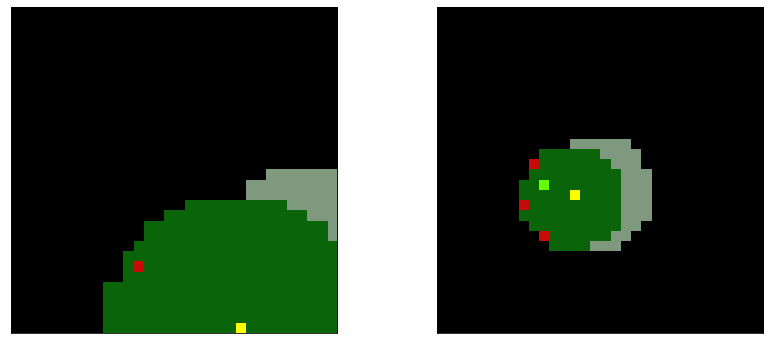

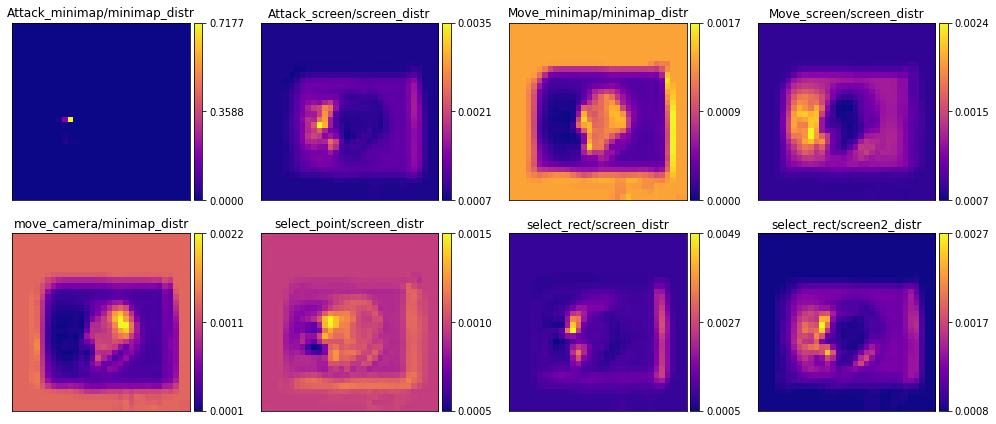


Step 10
Action select_army - prob: 0.00
Action Attack_screen - prob: 0.00
Action Move_screen - prob: 0.00
Action select_point - prob: 0.00
Action select_rect - prob: 0.00
Action move_camera - prob: 0.00
Action Stop_quick - prob: 0.00
Action Move_minimap - prob: 0.00
Action Attack_minimap - prob: 1.00
Action HoldPosition_quick - prob: 0.00
-----------------------------------
Action chosen:  Attack_minimap


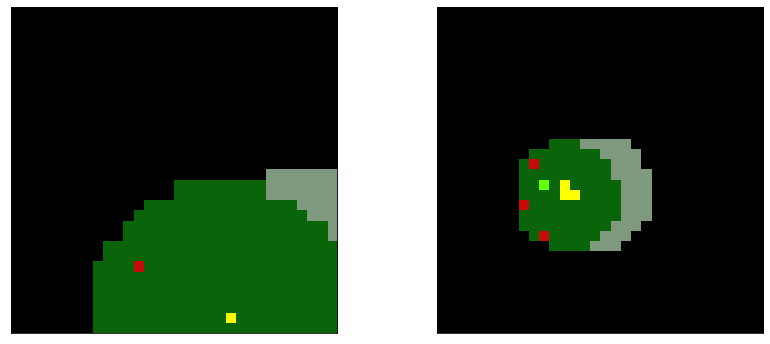

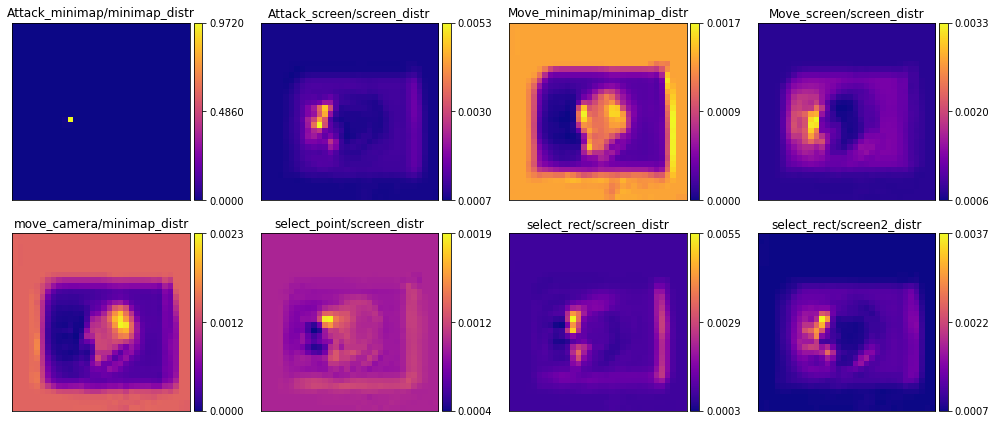


Step 11
Action select_army - prob: 0.00
Action Attack_screen - prob: 0.00
Action Move_screen - prob: 0.00
Action select_point - prob: 0.00
Action select_rect - prob: 0.00
Action move_camera - prob: 0.00
Action Stop_quick - prob: 0.00
Action Move_minimap - prob: 0.00
Action Attack_minimap - prob: 1.00
Action HoldPosition_quick - prob: 0.00
-----------------------------------
Action chosen:  Attack_minimap


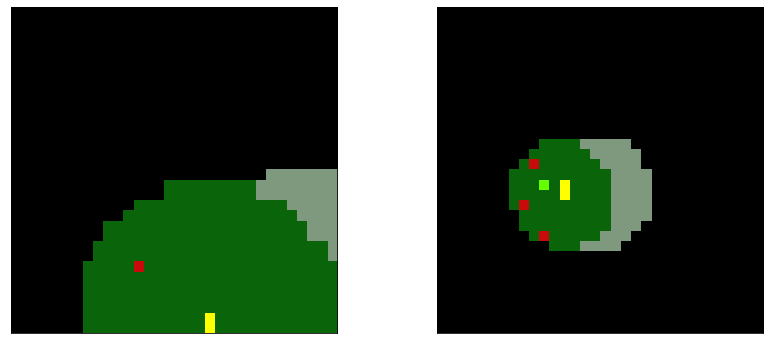

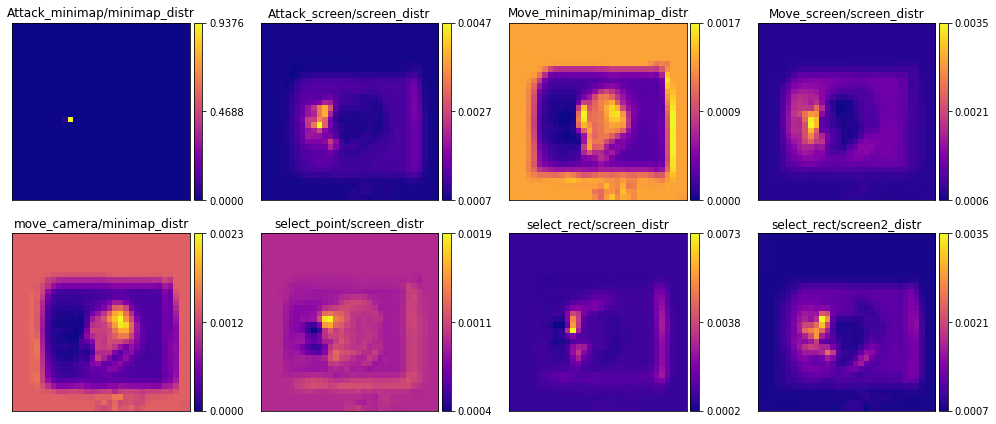


Step 12
Action select_army - prob: 0.00
Action Attack_screen - prob: 0.00
Action Move_screen - prob: 0.00
Action select_point - prob: 0.00
Action select_rect - prob: 0.00
Action move_camera - prob: 0.00
Action Stop_quick - prob: 0.00
Action Move_minimap - prob: 0.00
Action Attack_minimap - prob: 1.00
Action HoldPosition_quick - prob: 0.00
-----------------------------------
Action chosen:  Attack_minimap


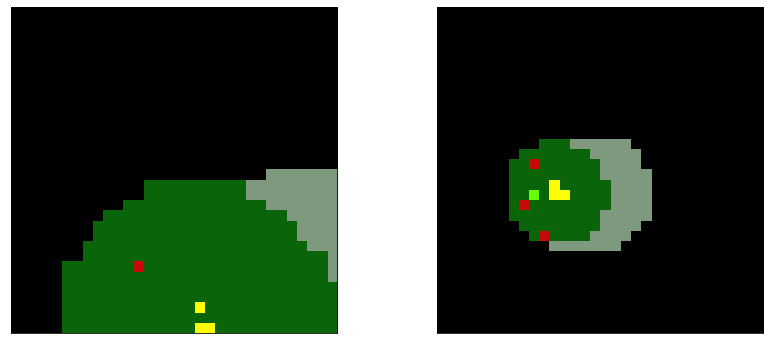

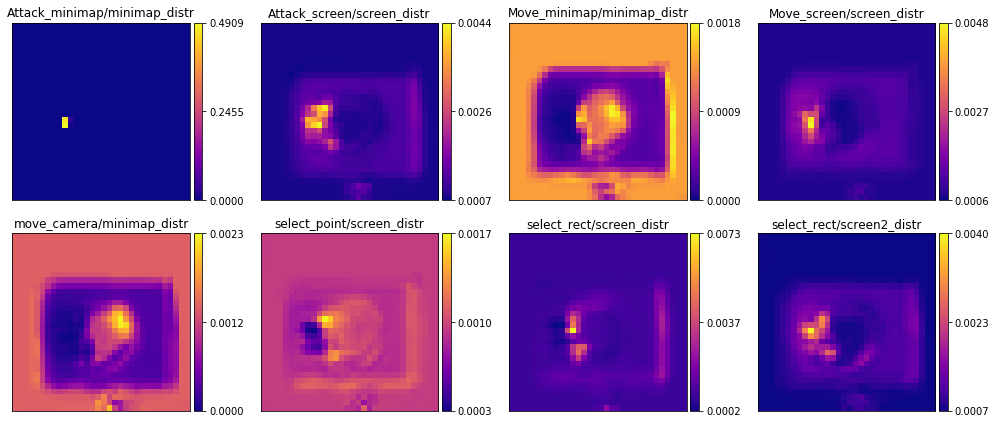


Step 13
Action select_army - prob: 0.00
Action Attack_screen - prob: 0.00
Action Move_screen - prob: 0.00
Action select_point - prob: 0.00
Action select_rect - prob: 0.00
Action move_camera - prob: 0.00
Action Stop_quick - prob: 0.00
Action Move_minimap - prob: 0.00
Action Attack_minimap - prob: 1.00
Action HoldPosition_quick - prob: 0.00
-----------------------------------
Action chosen:  Attack_minimap


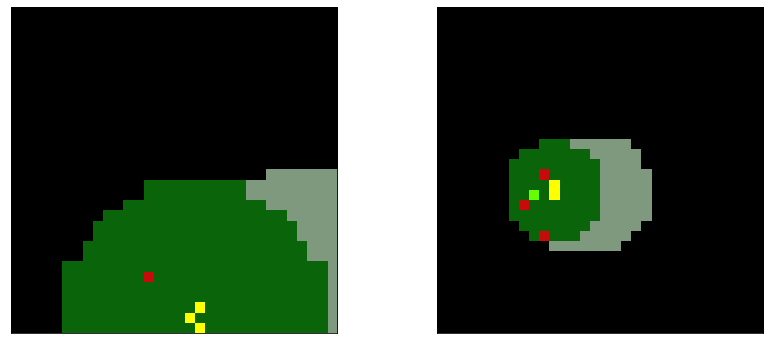

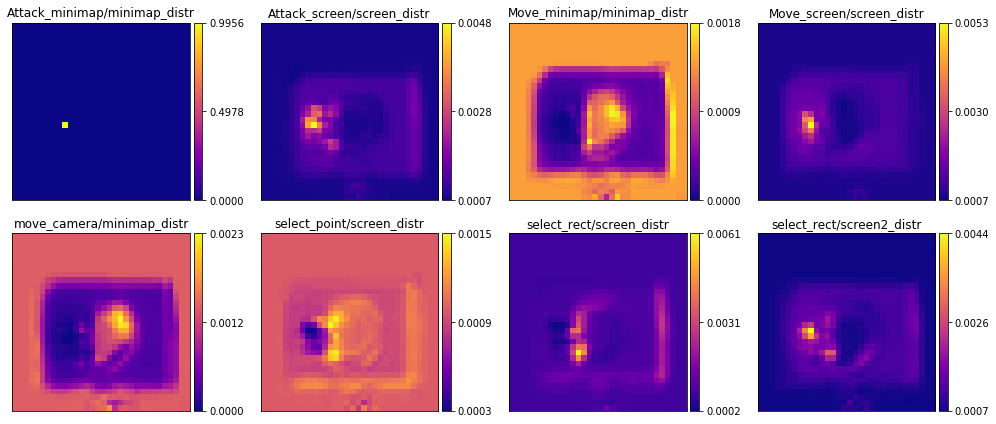


Step 14
Action select_army - prob: 0.00
Action Attack_screen - prob: 0.00
Action Move_screen - prob: 0.00
Action select_point - prob: 0.00
Action select_rect - prob: 0.00
Action move_camera - prob: 0.00
Action Stop_quick - prob: 0.00
Action Move_minimap - prob: 0.00
Action Attack_minimap - prob: 1.00
Action HoldPosition_quick - prob: 0.00
-----------------------------------
Action chosen:  Attack_minimap


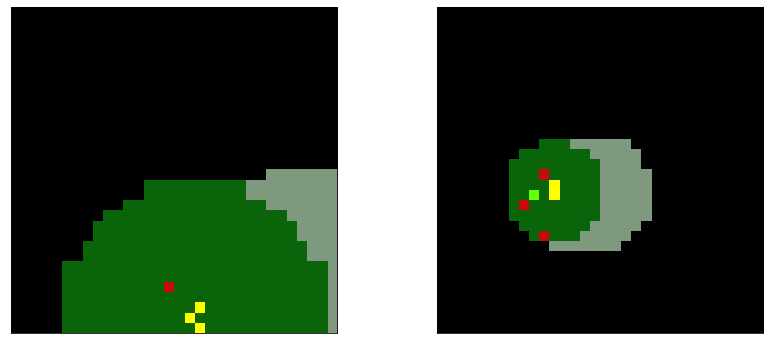

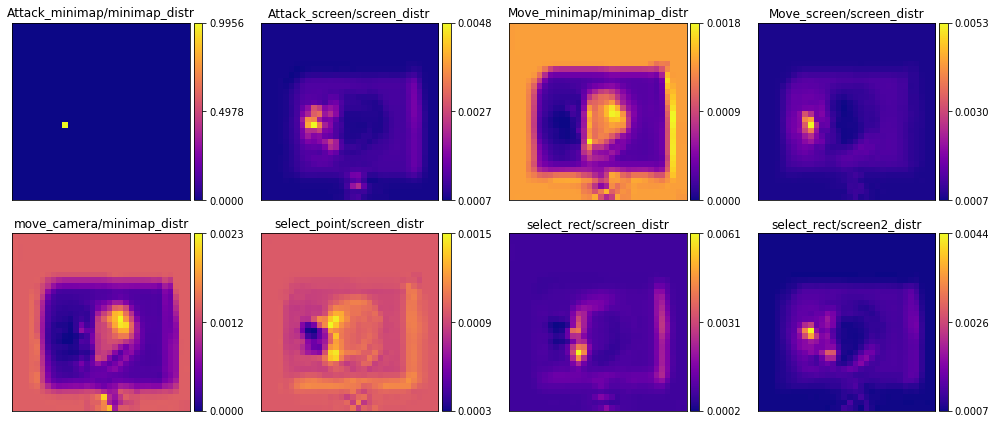


Step 15
Action select_army - prob: 0.00
Action Attack_screen - prob: 0.00
Action Move_screen - prob: 0.00
Action select_point - prob: 0.00
Action select_rect - prob: 0.00
Action move_camera - prob: 0.00
Action Stop_quick - prob: 0.00
Action Move_minimap - prob: 0.00
Action Attack_minimap - prob: 1.00
Action HoldPosition_quick - prob: 0.00
-----------------------------------
Action chosen:  Attack_minimap


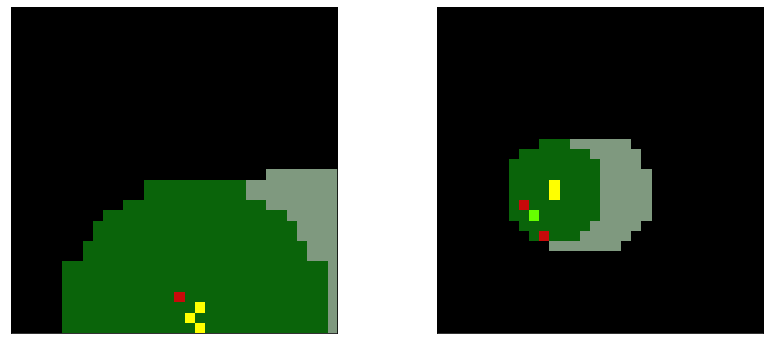

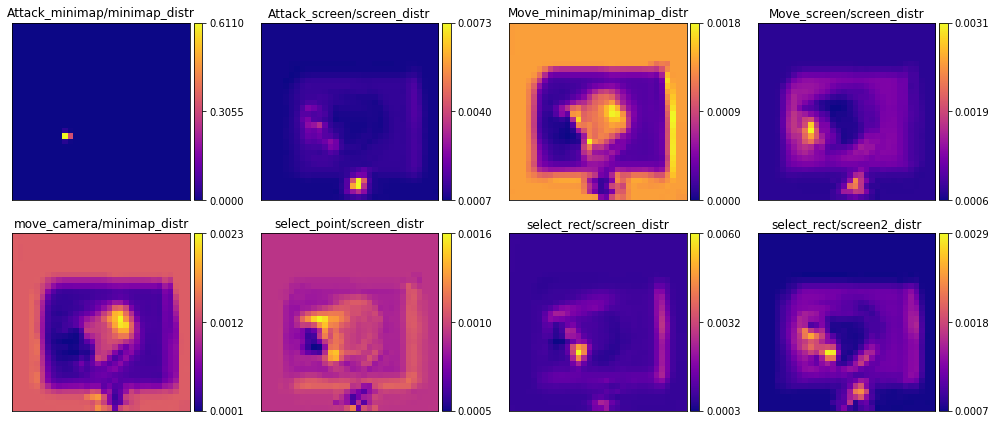


Step 16
Action select_army - prob: 0.00
Action Attack_screen - prob: 0.00
Action Move_screen - prob: 0.00
Action select_point - prob: 0.00
Action select_rect - prob: 0.00
Action move_camera - prob: 0.00
Action Stop_quick - prob: 0.00
Action Move_minimap - prob: 0.00
Action Attack_minimap - prob: 1.00
Action HoldPosition_quick - prob: 0.00
-----------------------------------
Action chosen:  Attack_minimap


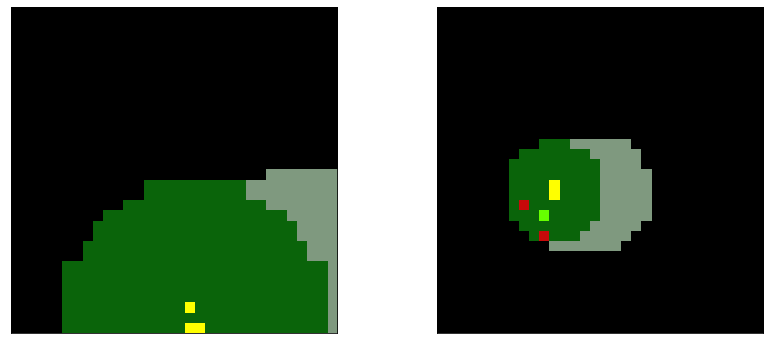

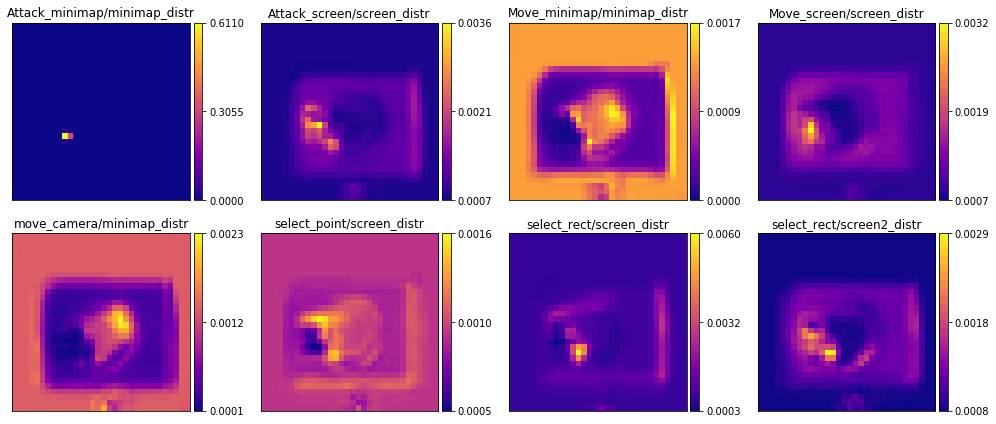


Step 17
Action select_army - prob: 0.00
Action Attack_screen - prob: 0.00
Action Move_screen - prob: 0.00
Action select_point - prob: 0.00
Action select_rect - prob: 0.00
Action move_camera - prob: 0.00
Action Stop_quick - prob: 0.00
Action Move_minimap - prob: 0.00
Action Attack_minimap - prob: 1.00
Action HoldPosition_quick - prob: 0.00
-----------------------------------
Action chosen:  Attack_minimap


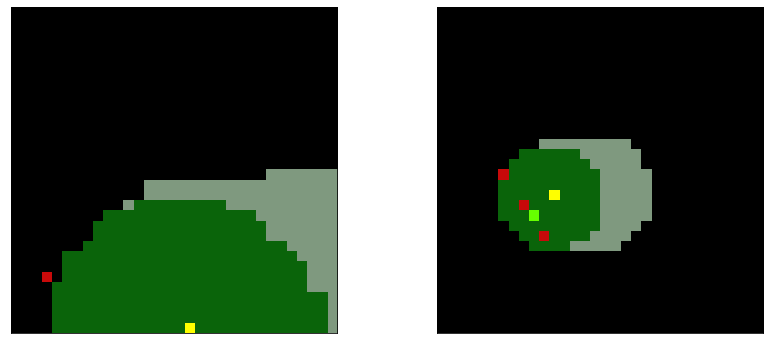

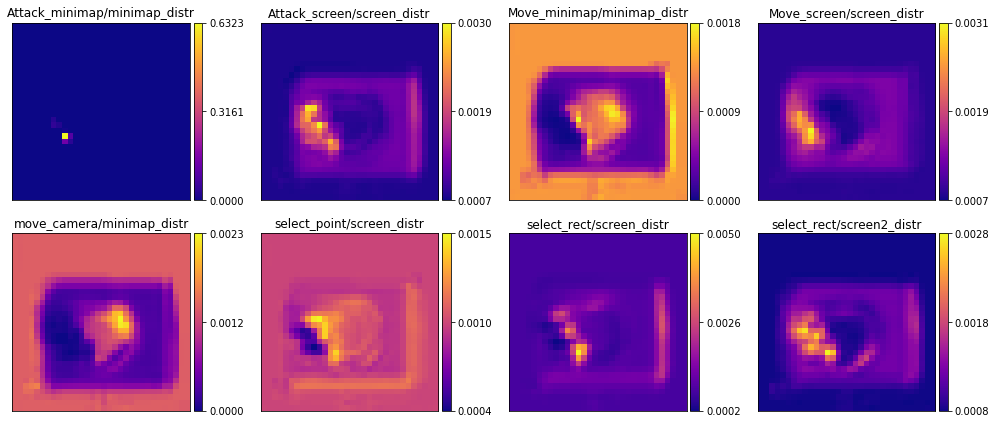


Step 18
Action select_army - prob: 0.00
Action Attack_screen - prob: 0.00
Action Move_screen - prob: 0.00
Action select_point - prob: 0.00
Action select_rect - prob: 0.00
Action move_camera - prob: 0.00
Action Stop_quick - prob: 0.00
Action Move_minimap - prob: 0.00
Action Attack_minimap - prob: 1.00
Action HoldPosition_quick - prob: 0.00
-----------------------------------
Action chosen:  Attack_minimap


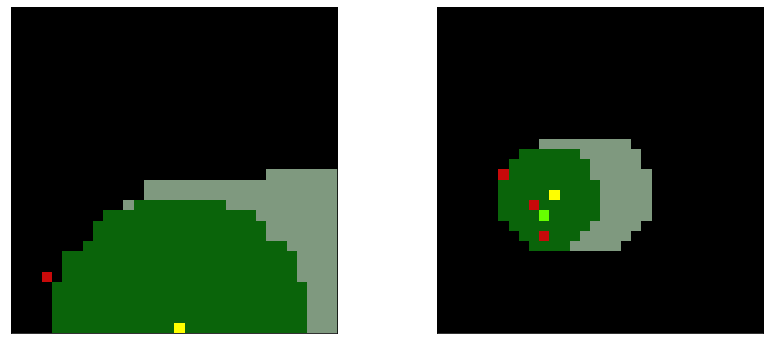

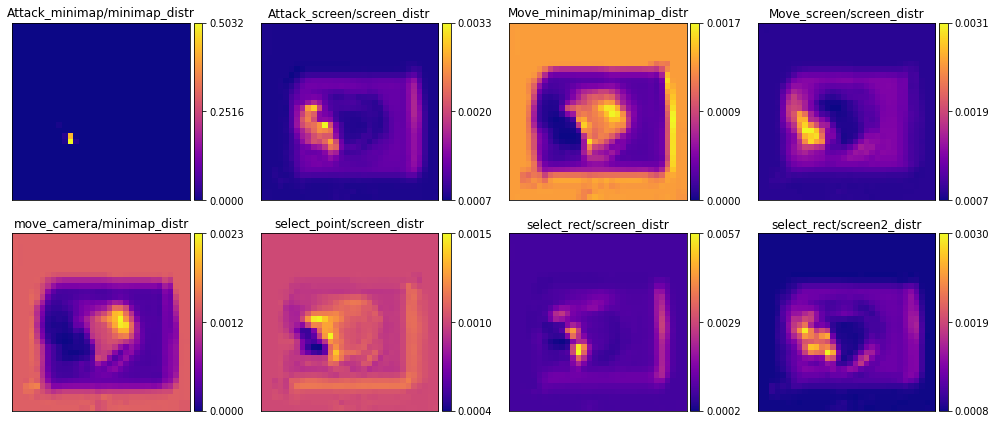


Step 19
Action select_army - prob: 0.00
Action Attack_screen - prob: 0.00
Action Move_screen - prob: 0.00
Action select_point - prob: 0.00
Action select_rect - prob: 0.00
Action move_camera - prob: 0.00
Action Stop_quick - prob: 0.00
Action Move_minimap - prob: 0.00
Action Attack_minimap - prob: 1.00
Action HoldPosition_quick - prob: 0.00
-----------------------------------
Action chosen:  Attack_minimap


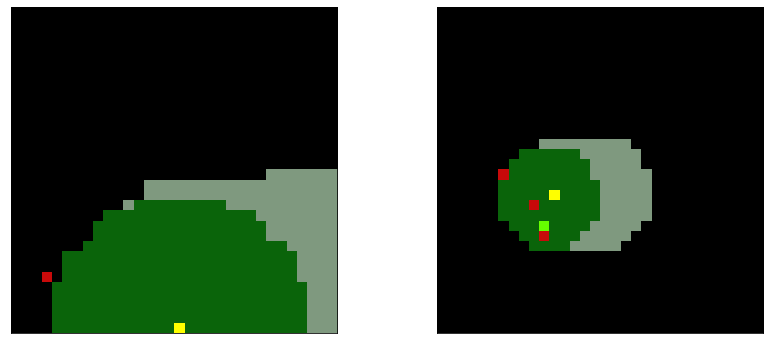

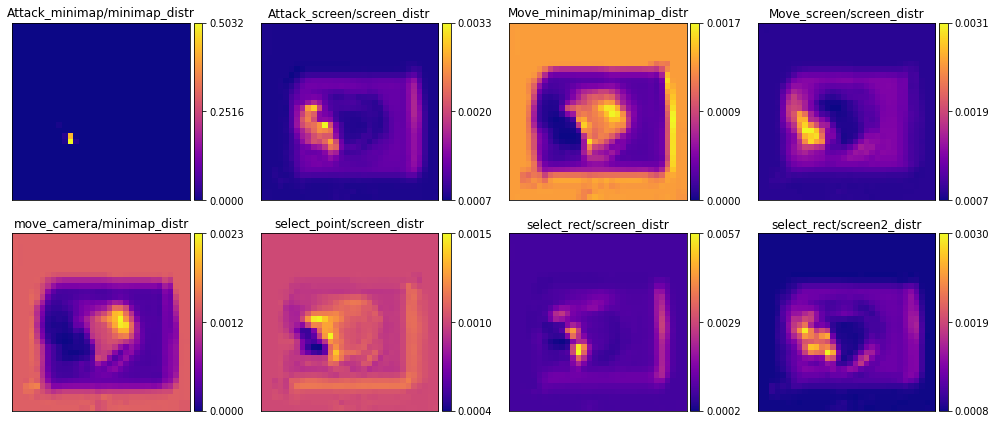


Step 20
Action select_army - prob: 0.00
Action Attack_screen - prob: 0.00
Action Move_screen - prob: 0.00
Action select_point - prob: 0.00
Action select_rect - prob: 0.00
Action move_camera - prob: 0.00
Action Stop_quick - prob: 0.00
Action Move_minimap - prob: 0.00
Action Attack_minimap - prob: 1.00
Action HoldPosition_quick - prob: 0.00
-----------------------------------
Action chosen:  Attack_minimap


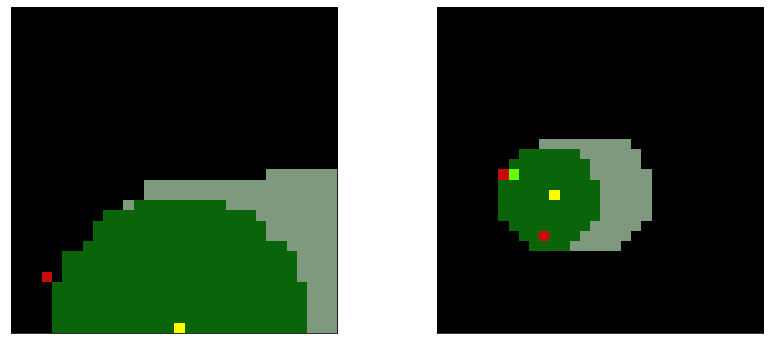

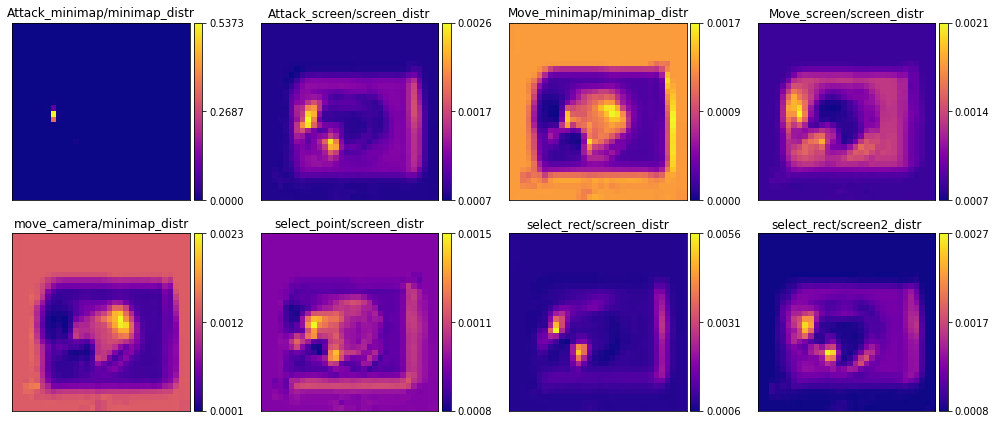


Step 21
Action select_army - prob: 0.00
Action Attack_screen - prob: 0.00
Action Move_screen - prob: 0.00
Action select_point - prob: 0.00
Action select_rect - prob: 0.00
Action move_camera - prob: 0.00
Action Stop_quick - prob: 0.00
Action Move_minimap - prob: 0.00
Action Attack_minimap - prob: 1.00
Action HoldPosition_quick - prob: 0.00
-----------------------------------
Action chosen:  Attack_minimap


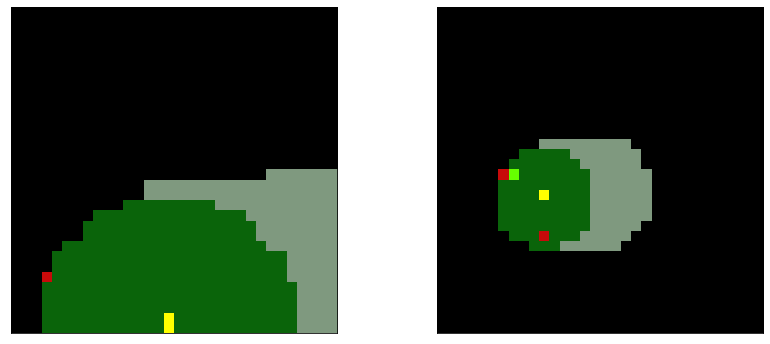

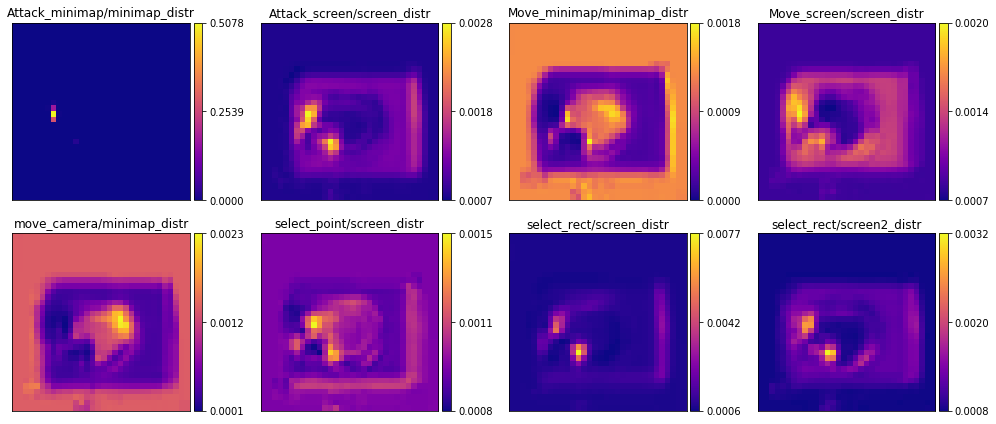


Step 22
Action select_army - prob: 0.00
Action Attack_screen - prob: 0.00
Action Move_screen - prob: 0.00
Action select_point - prob: 0.00
Action select_rect - prob: 0.00
Action move_camera - prob: 0.00
Action Stop_quick - prob: 0.00
Action Move_minimap - prob: 0.00
Action Attack_minimap - prob: 1.00
Action HoldPosition_quick - prob: 0.00
-----------------------------------
Action chosen:  Attack_minimap


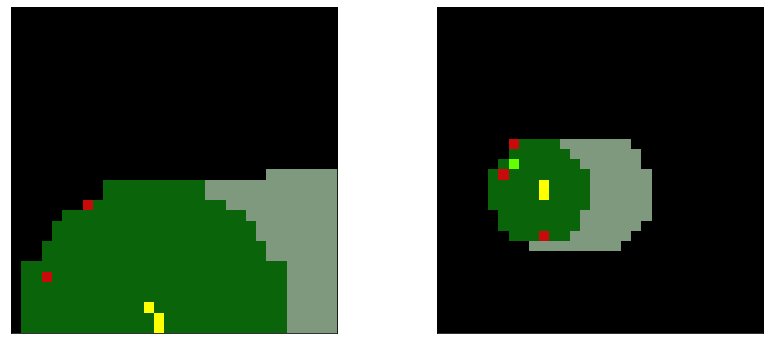

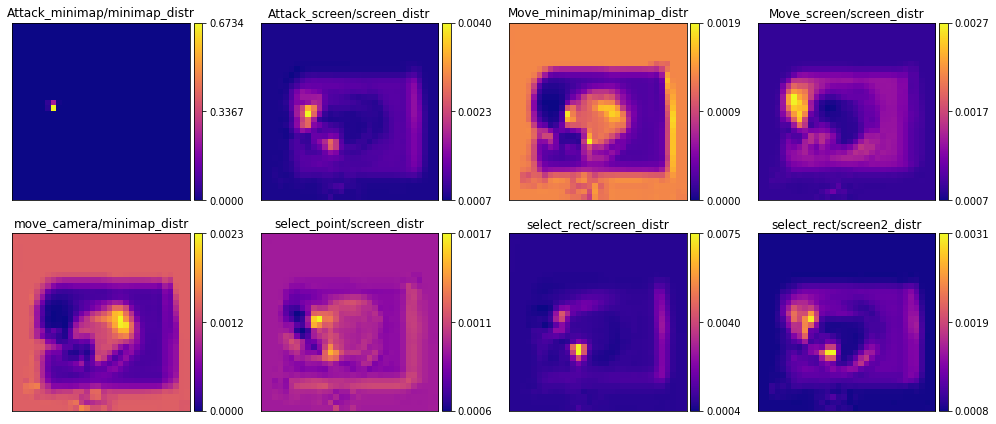


Step 23
Action select_army - prob: 0.00
Action Attack_screen - prob: 0.00
Action Move_screen - prob: 0.00
Action select_point - prob: 0.00
Action select_rect - prob: 0.00
Action move_camera - prob: 0.00
Action Stop_quick - prob: 0.00
Action Move_minimap - prob: 0.00
Action Attack_minimap - prob: 1.00
Action HoldPosition_quick - prob: 0.00
-----------------------------------
Action chosen:  Attack_minimap


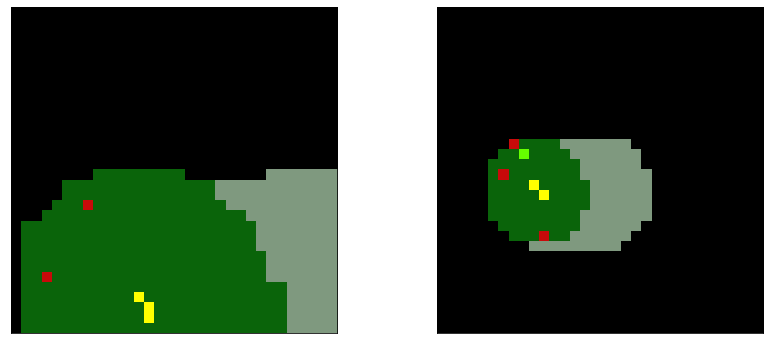

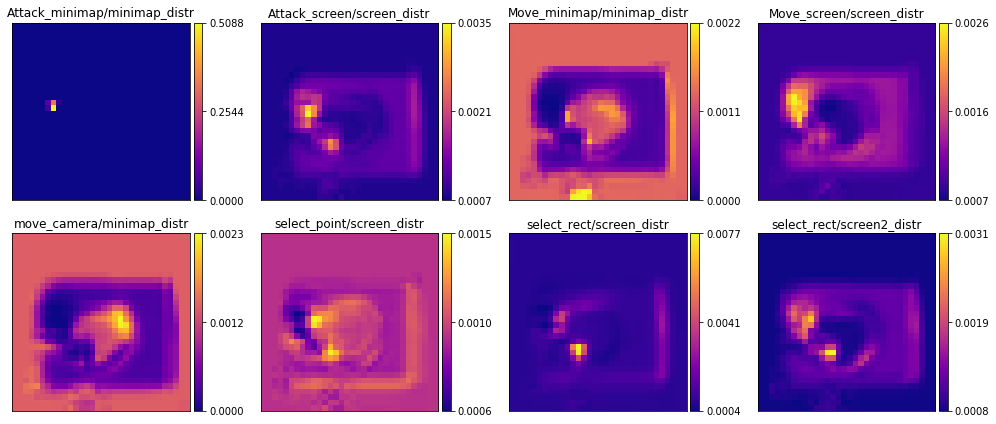


Step 24
Action select_army - prob: 0.00
Action Attack_screen - prob: 0.00
Action Move_screen - prob: 0.00
Action select_point - prob: 0.00
Action select_rect - prob: 0.00
Action move_camera - prob: 0.00
Action Stop_quick - prob: 0.00
Action Move_minimap - prob: 0.00
Action Attack_minimap - prob: 1.00
Action HoldPosition_quick - prob: 0.00
-----------------------------------
Action chosen:  Attack_minimap


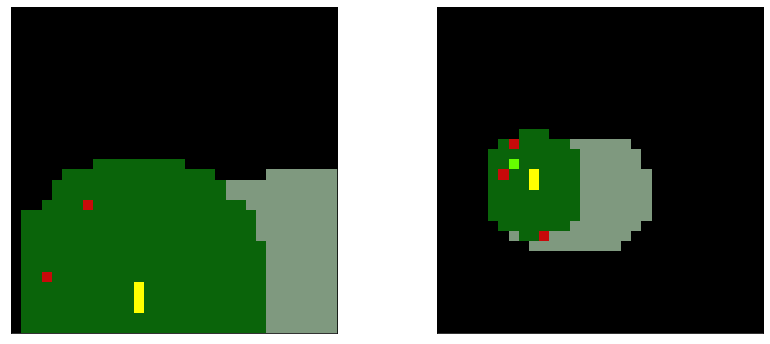

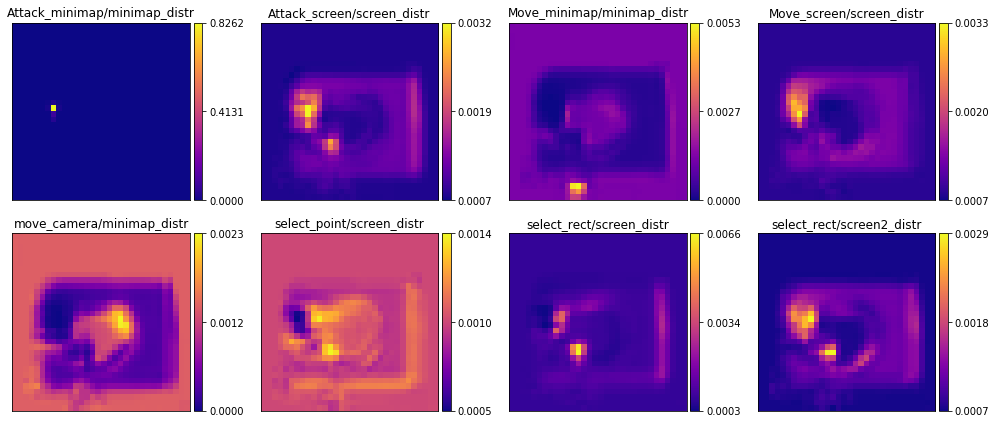


Step 25
Action select_army - prob: 0.00
Action Attack_screen - prob: 0.00
Action Move_screen - prob: 0.00
Action select_point - prob: 0.00
Action select_rect - prob: 0.00
Action move_camera - prob: 0.00
Action Stop_quick - prob: 0.00
Action Move_minimap - prob: 0.00
Action Attack_minimap - prob: 1.00
Action HoldPosition_quick - prob: 0.00
-----------------------------------
Action chosen:  Attack_minimap


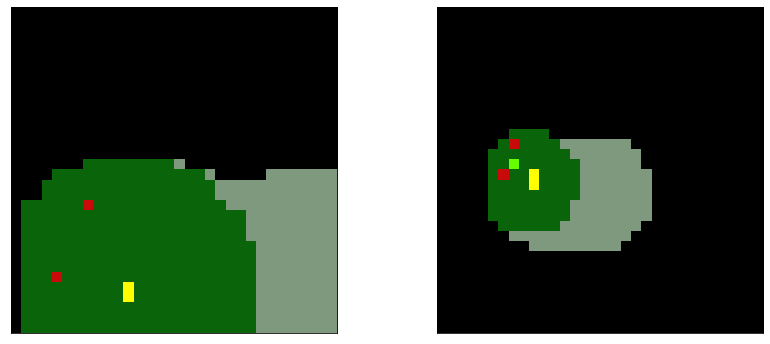

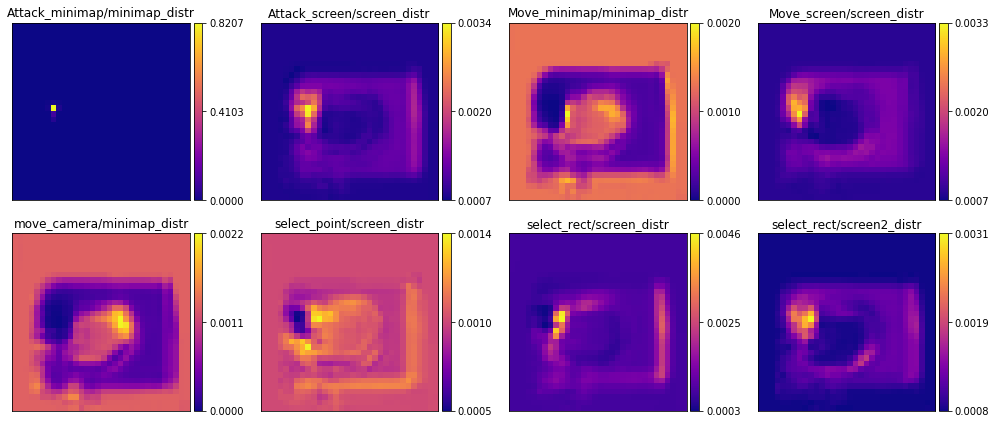


Step 26
Action select_army - prob: 0.00
Action Attack_screen - prob: 0.00
Action Move_screen - prob: 0.00
Action select_point - prob: 0.00
Action select_rect - prob: 0.00
Action move_camera - prob: 0.00
Action Stop_quick - prob: 0.00
Action Move_minimap - prob: 0.00
Action Attack_minimap - prob: 1.00
Action HoldPosition_quick - prob: 0.00
-----------------------------------
Action chosen:  Attack_minimap


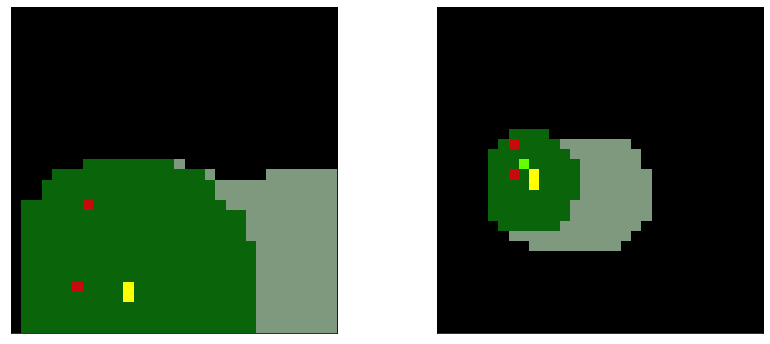

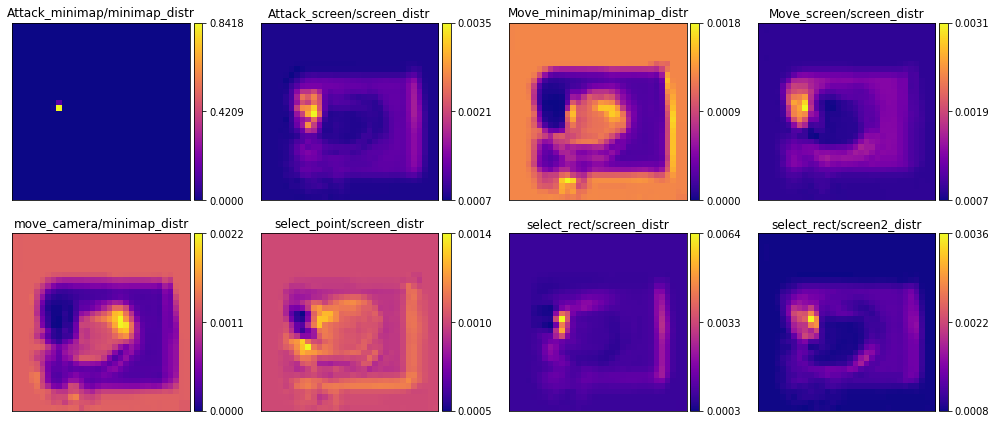


Step 27
Action select_army - prob: 0.00
Action Attack_screen - prob: 0.00
Action Move_screen - prob: 0.00
Action select_point - prob: 0.00
Action select_rect - prob: 0.00
Action move_camera - prob: 0.00
Action Stop_quick - prob: 0.00
Action Move_minimap - prob: 0.00
Action Attack_minimap - prob: 1.00
Action HoldPosition_quick - prob: 0.00
-----------------------------------
Action chosen:  Attack_minimap


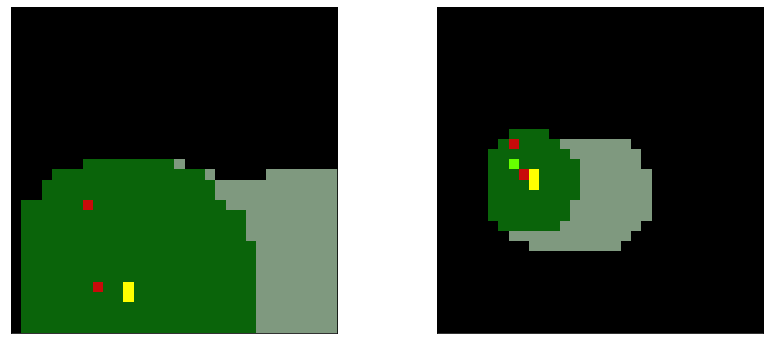

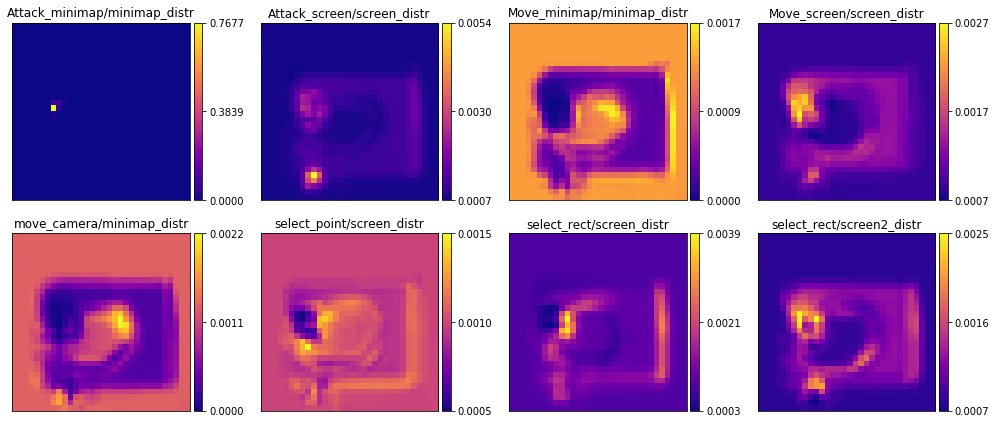


Step 28
Action select_army - prob: 0.00
Action Attack_screen - prob: 0.00
Action Move_screen - prob: 0.00
Action select_point - prob: 0.00
Action select_rect - prob: 0.00
Action move_camera - prob: 0.00
Action Stop_quick - prob: 0.00
Action Move_minimap - prob: 0.00
Action Attack_minimap - prob: 1.00
Action HoldPosition_quick - prob: 0.00
-----------------------------------
Action chosen:  Attack_minimap


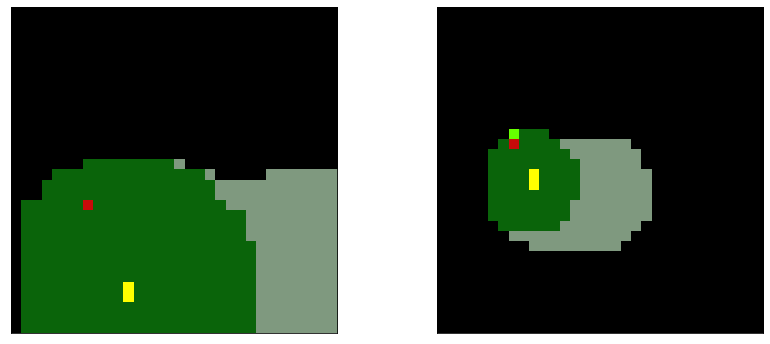

KeyboardInterrupt: 

In [40]:
#for t in range(len(insp_dict['state_traj'])):
for t in range(50):
    print_action_info(inspector, insp_dict, t)
    plot_screen_and_decision(inspector, insp_dict, layer_names, t, show_minimap=True)